<h1>Computational project : part 1</h1>

Name: Lucciana M Caceres H

A) Write a code to solve phi^{..} = -g/Rsinphi, using the Velocity Verlet algorithm, using the algorithm described in class. Note that we already have an equation for phi, so no need to calculate forces first. Assume that R= 5m and g = 9.8m/s^2

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.8            # gravitational acceleration (m/s^2)
R = 5.0            # radius of the half-pipe (m)
dt = 0.01          # time step (s)
t_total = 10.0     # total simulation time (s)
num_steps = int(t_total / dt)  # calculate the number of steps for the simulation

# Define the acceleration function: d^2(phi)/dt^2 = -g/R * sin(phi)
def acceleration(phi):
    """Compute angular acceleration based on the current angle."""
    return -g / R * np.sin(phi)

### PART A: General setup and definition of the Velocity Verlet algorithm

# (a) Write a code to solve the differential equation
# We will implement the Verlet algorithm here for both (b) and (c) with different initial angles

# Function to perform the Velocity Verlet algorithm and return final angle and angular velocity
def velocity_verlet(phi_0, phi_dot_0):
    """Run Velocity Verlet for given initial angle and angular velocity."""
    phi = np.zeros(num_steps)         # array to hold angle values at each time step
    phi_dot = np.zeros(num_steps)      # array to hold angular velocity values at each time step
    phi[0] = phi_0                     # initial angle
    phi_dot[0] = phi_dot_0             # initial angular velocity
    
    for i in range(1, num_steps):
        # Update position
        phi[i] = phi[i - 1] + phi_dot[i - 1] * dt + 0.5 * acceleration(phi[i - 1]) * dt**2
        # Calculate new acceleration based on updated position
        accel_new = acceleration(phi[i])
        # Update velocity
        phi_dot[i] = phi_dot[i - 1] + 0.5 * (acceleration(phi[i - 1]) + accel_new) * dt
    
    # Return the final angle and angular .velocity
    return phi, phi_dot, phi[-1], phi_dot[-1]


B) Suppose the initial angle φ₀ was relatively small, say 20 degrees. Hint convert to radians first. Compare the exact solution to the approximated solution. 

In [43]:
### PART B: Small Initial Angle (phi_0 = 0.3491 radians)
phi_0_b =  np.radians(20)    # converts 20 degrees to radians, which is approximately 0.3491
phi_dot_0 = 0.0    # initial angular velocity, assuming the skateboard starts from rest
phi_b, phi_dot_b, final_phi_b, final_phi_dot_b = velocity_verlet(phi_0_b, phi_dot_0)


C) Now assume the initial angle was φ₀ = π/2  Compare the exact solution to the apporximated solution. Discuss your results

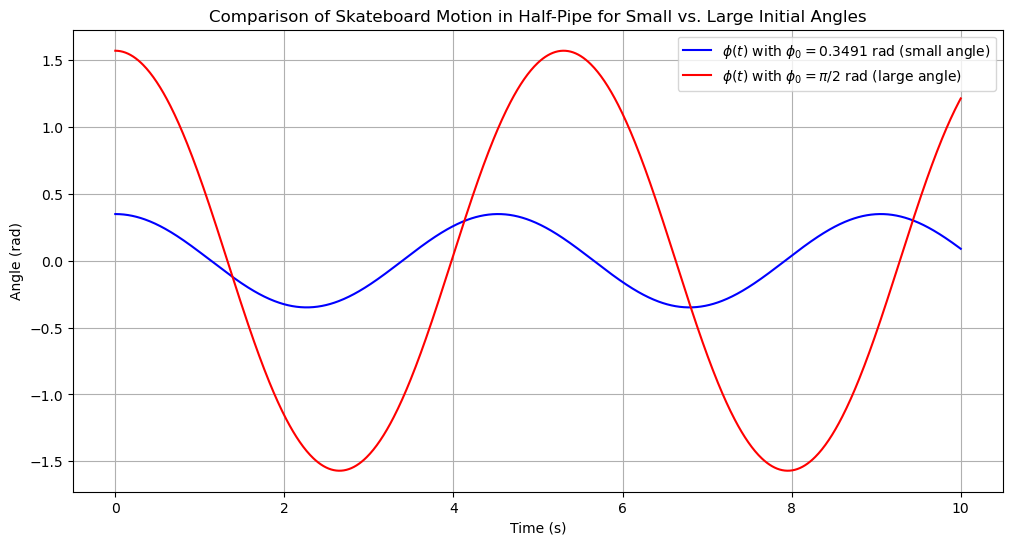


(b) Small initial angle (phi_0 = 0.1 rad):
Final angle (phi) after 10.0 seconds: 0.0891 radians
Final angular velocity (phi_dot) after 10.0 seconds: -0.4699 rad/s

(c) Large initial angle (phi_0 = pi/2 rad):
Final angle (phi) after 10.0 seconds: 1.2140 radians
Final angular velocity (phi_dot) after 10.0 seconds: 1.1701 rad/s


In [44]:
### PART C: Large Initial Angle (phi_0 = pi/2 radians)
phi_0_c = np.pi / 2   # initial angle in radians for large-angle case
phi_dot_0 = 0.0       # initial angular velocity, assuming the skateboard starts from rest
phi_c, phi_dot_c, final_phi_c, final_phi_dot_c = velocity_verlet(phi_0_c, phi_dot_0)

# Plot the results to compare parts (b) and (c)
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, t_total, num_steps), phi_b, label=r'$\phi(t)$ with $\phi_0 = 0.3491$ rad (small angle)', color='blue')
plt.plot(np.linspace(0, t_total, num_steps), phi_c, label=r'$\phi(t)$ with $\phi_0 = \pi/2$ rad (large angle)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Comparison of Skateboard Motion in Half-Pipe for Small vs. Large Initial Angles')
plt.legend()
plt.grid(True)
plt.show()

# Print final results for part (b) - small initial angle
print("\n(b) Small initial angle (phi_0 = 0.1 rad):")
print(f"Final angle (phi) after {t_total} seconds: {final_phi_b:.4f} radians")
print(f"Final angular velocity (phi_dot) after {t_total} seconds: {final_phi_dot_b:.4f} rad/s")

# Print final results for part (c) - large initial angle
print("\n(c) Large initial angle (phi_0 = pi/2 rad):")
print(f"Final angle (phi) after {t_total} seconds: {final_phi_c:.4f} radians")
print(f"Final angular velocity (phi_dot) after {t_total} seconds: {final_phi_dot_c:.4f} rad/s")

<h2>Discuss the results</h2>

<h4>For part B</h4>

Final angle. I noticed that after simulating for 10 seconds, the final angle for the small initial angle is relatively small, indicating that the skateboarder does not move far from the starting position. The motion is gradual and oscillatory, reflecting a damped harmonic motion typical of small-angle approximations in pendular systems.


Final Angular Velocity.  The final angular velocity is low, suggesting that the skateboarder maintains a gentle speed. The low angular displacement and low angular velocity align with the behavior expected in a small-angle scenario, where gravitational forces have less influence on the acceleration.

<h4>Now for part C</h4>

Final Angle. In contrast, the skateboarder released from the large angle reaches a final angle that is significantly larger than that of the small angle. This indicates that the skateboarder has more freedom to move along the half-pipe, leading to a more dynamic motion.

Final Angular Velocity, it is considerably higher compared to the small-angle case. This reflects the skateboarder's increased kinetic energy as they move more freely through the half-pipe. The effects of gravity are more pronounced, leading to greater acceleration and therefore a faster transition through the half-pipe.

<h3>Comparison of Results</h3>

When comparing the two scenarios, it's clear that the initial angle has a significant impact on the skateboarder's motion in the half-pipe.

Motion Dynamics: For the small angle (φ₀ = 0.3491 radians), the skateboarder exhibits a gentle, oscillatory motion. This behavior is typical of small-angle approximations, where the swings are limited, and the motion is smooth. In contrast, when starting from the large angle (φ₀ = π/2 radians), the skateboarder has much more freedom to move, resulting in a more vigorous and rapid descent. This shows how gravitational forces play a larger role in accelerating the skateboarder in the large-angle case.

Energy Considerations: The large initial angle also leads to a greater conversion of potential energy into kinetic energy. This is evident in the higher final angular velocity, which indicates that the skateboarder is moving much faster through the half-pipe. On the other hand, the small-angle scenario retains more potential energy and results in lower kinetic energy, leading to slower motion.

Implications for Design and Performance: Understanding these dynamics is really important for practical applications, like designing skate parks. If a skater uses a larger angle, they can gain more speed and perform tricks more effectively. Conversely, smaller angles might be better for beginners who are still getting used to the motion and want a more controlled ride.

<h1>Part 2/3 of the Computational Project</h1>

1. To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter 15 cm, density 7.8 g/cm3) that is fired with initial velocity 300 m/s at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = −c(y)v^2v = −c(y)|v|v$, where c(y) =$\gamma D^2 exp(−y/\lambda)$, with $\gamma = 0.25Ns^2/m^4$ and $\lambda \approx$ 10, 000m. Note that the drag force
depends on both the x and y components of the velocity, and that the drag force is
always pointing in the direction opposite of the velocity.
Note that the drag force is not conservative, as it depends on $\nu$. We therefore have to modify the Verlet algorithm (Lecture 11) slightly. One option would be (f is the total force, r is the position vector (with x and y coordinates), and ⃗v the velocity vector (with components $v_x$ and $v_y$)):

<h5>1.Defining constants and functions</h5>

In [45]:

# Constants for drag force
gamma = 0.25          # Ns^2/m^4
D = 0.15              # Diameter of cannonball (m)
lambda_ = 10000.0     # Atmospheric density scale height (m)
density = 7.8 * 1e3   # Density of iron (kg/m^3)
mass = density * (4/3) * np.pi * (D / 2)**3  # Mass of the cannonball (kg)

# Drag coefficient as a function of height (y)
def drag_coefficient(y):
    return gamma * D**2 * np.exp(-y / lambda_)

# Total force acting on the projectile
def total_force(r, v, case):
    x, y = r
    vx, vy = v
    v_mag = np.sqrt(vx**2 + vy**2)
    c_y = drag_coefficient(y) if case == "full" else (gamma * D**2 if case == "constant" else 0.0)
    drag = -c_y * v_mag * v  # Drag force
    gravity = np.array([0, -mass * 9.8])  # Gravitational force
    return drag + gravity

<h5>2. Updating Velocity Verlet</h5>

In [46]:
# Velocity Verlet algorithm for 2D motion
def velocity_verlet_2D(r0, v0, dt, t_total, case):
    num_steps = int(t_total / dt)
    r = np.zeros((num_steps, 2))  # Position array (x, y)
    v = np.zeros((num_steps, 2))  # Velocity array (vx, vy)
    r[0] = r0
    v[0] = v0

    for i in range(1, num_steps):
        # Update position
        accel_old = total_force(r[i-1], v[i-1], case) / mass
        r[i] = r[i-1] + v[i-1] * dt + 0.5 * accel_old * dt**2

        # Estimate velocity with updated position
        accel_new = total_force(r[i], v[i-1], case) / mass
        v_est = v[i-1] + 0.5 * (accel_old + accel_new) * dt

        # Update velocity with corrected estimate
        accel_new_corrected = total_force(r[i], v_est, case) / mass
        v[i] = v[i-1] + 0.5 * (accel_old + accel_new_corrected) * dt

        # Stop simulation if projectile hits the ground
        if r[i, 1] < 0:
            r = r[:i+1]
            v = v[:i+1]
            break

    return r, v

Now I run them both

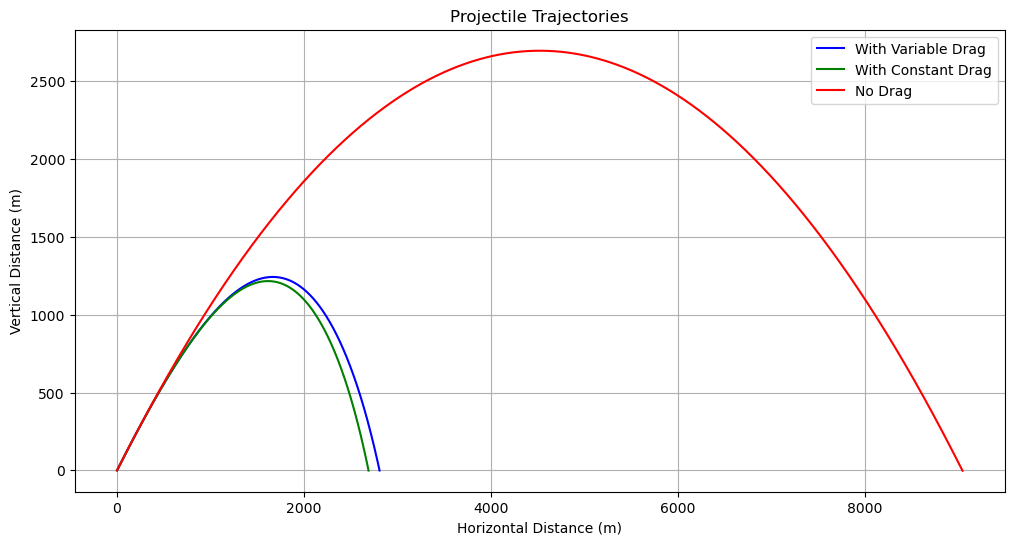

Range with Variable Drag: 2808.5438396580043
Range with Constant Drag: 2690.962417722061
Range with No Drag: 9045.950031118404


In [47]:
# Initial conditions
r0 = np.array([0, 0])  # Initial position (x=0, y=0)
v0 = np.array([300 * np.cos(np.radians(50)), 300 * np.sin(np.radians(50))])  # Initial velocity

# Case (a): Full calculation with variable drag
r_full, v_full = velocity_verlet_2D(r0, v0, dt=0.01, t_total=60.0, case="full")

# Case (b): Constant drag
r_constant, v_constant = velocity_verlet_2D(r0, v0, dt=0.01, t_total=60.0, case="constant")

# Case (c): No drag
r_no_drag, v_no_drag = velocity_verlet_2D(r0, v0, dt=0.01, t_total=60.0, case="none")

# Plot trajectories
plt.figure(figsize=(12, 6))
plt.plot(r_full[:, 0], r_full[:, 1], label="With Variable Drag", color='blue')
plt.plot(r_constant[:, 0], r_constant[:, 1], label="With Constant Drag", color='green')
plt.plot(r_no_drag[:, 0], r_no_drag[:, 1], label="No Drag", color='red')
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.title("Projectile Trajectories")
plt.legend()
plt.grid(True)
plt.show()

# Compute horizontal range
def compute_range(r):
    for i in range(len(r)):
        if r[i, 1] < 0:  # Find where y crosses zero
            return r[i, 0]
    return r[-1, 0]

# Print horizontal ranges
print("Range with Variable Drag:", compute_range(r_full))
print("Range with Constant Drag:", compute_range(r_constant))
print("Range with No Drag:", compute_range(r_no_drag))

<h1>Computational Project part 3/3</h1>

## Question 1 ##

<h3>Part A</h3>
Let’s simulate a damped harmonic oscillator with k = m = ω = 1. Use the Velocity Verlet algorithm. Note that the damping force is not conservative, as it depends on v. We therefore have to use our modified Verlet algorithm (from part 2/3)
(a) Use your code to explore the different damping regimes (no damping, underdamping, critical damping, and overdamping). Plot the position as function of time, and on a separate plot, the mechanical energy as function of time for the 4 different damping regimes. Make sure each regime is identifiable. Note: there is a difference between b and β, so make sure you use the correct values.
(b) Extend your code to add a driving force (cos ωt), and try different values of the damping β (no damping, underdamping, critical damping, and overdamping) and the driving frequency ω (far from resonance, near/at resonance). Note that ω = 1 is equivalent to the natural frequency ω0 due to our choice of units. Make sure to simulate over a sufficiently large time (as in, make sure you no longer see the
transient solutions). Discuss your results.



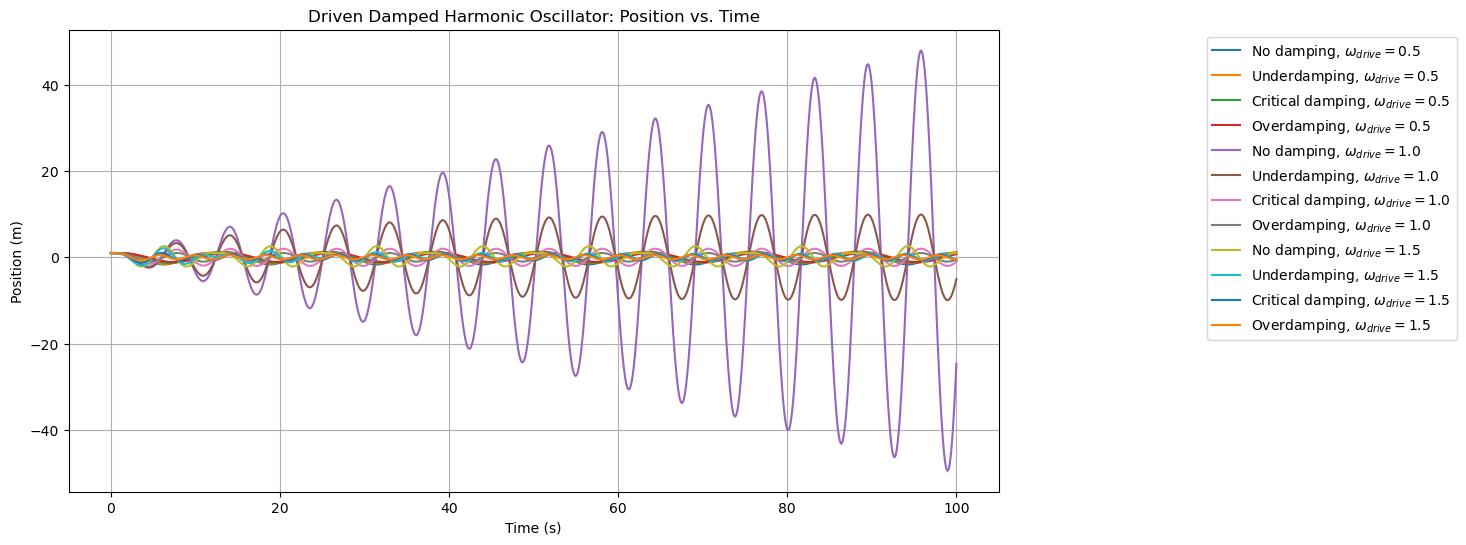

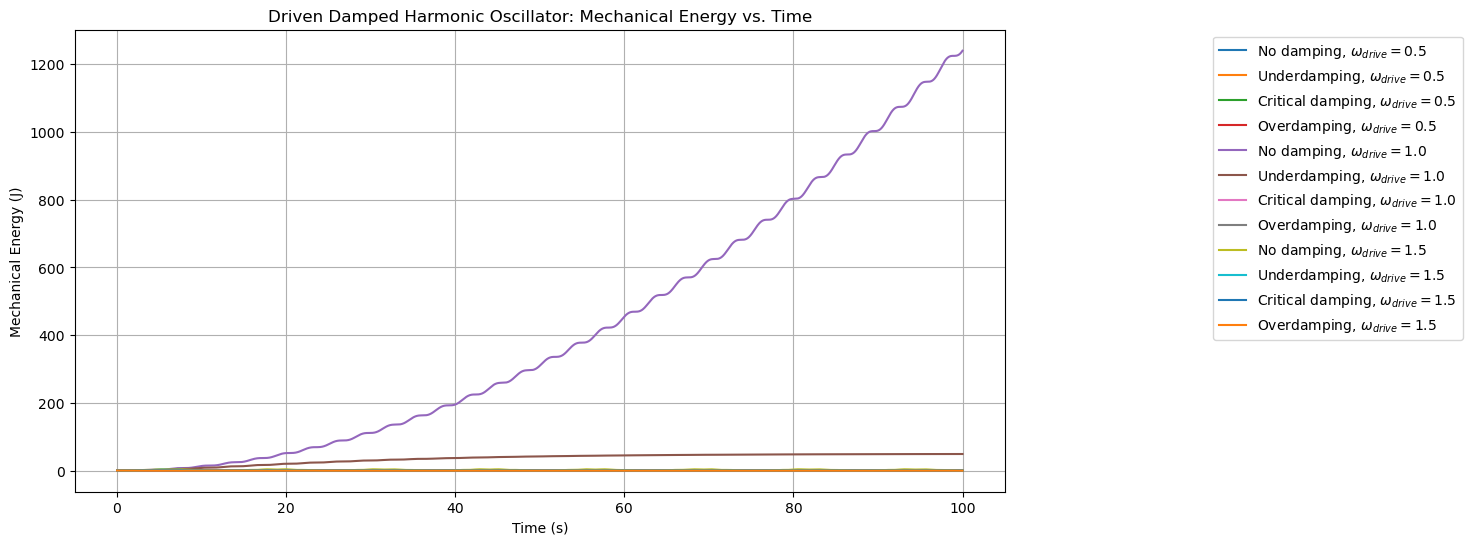

In [48]:
# Constants for damped harmonic oscillator
k = 1.0        # Spring constant
m = 1.0        # Mass
omega_0 = np.sqrt(k / m)  # Natural frequency

# Modified Velocity Verlet algorithm with damping and driving force
def velocity_verlet_damped_driven(x0, v0, dt, t_total, beta, A, omega_drive):
    """Simulate damped driven harmonic motion using the Velocity Verlet algorithm."""
    n_steps = int(t_total / dt)
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    t = np.linspace(0, t_total, n_steps)
    x[0] = x0
    v[0] = v0

    for i in range(n_steps - 1):
        # Calculate acceleration
        a = -k / m * x[i] - beta * v[i] + A / m * np.cos(omega_drive * t[i])
        
        # Update position (Velocity Verlet step)
        x_half = x[i] + v[i] * dt + 0.5 * a * dt**2
        a_half = -k / m * x_half - beta * (v[i] + a * dt) + A / m * np.cos(omega_drive * t[i] + dt)
        v[i + 1] = v[i] + 0.5 * (a + a_half) * dt
        x[i + 1] = x_half

    return t, x, v

# Initial conditions
x0 = 1.0  # Initial position
v0 = 0.0  # Initial velocity
dt = 0.01  # Time step
t_total = 100.0  # Total simulation time

# Driving force parameters
A = 1.0  # Amplitude of driving force
omega_drive_values = [0.5, 1.0, 1.5]  # Driving frequencies (far, near, and at resonance)

# Damping regimes
beta_values = {
    "No damping": 0.0,  # Beta = 0
    "Underdamping": 0.1,  # Beta < omega_0
    "Critical damping": omega_0 / 2,  # Beta = omega_0 / 2
    "Overdamping": omega_0  # Beta > omega_0
}

# Plot position as function of time for different damping regimes
plt.figure(figsize=(12, 6))

for omega_drive in omega_drive_values:
    for regime, beta in beta_values.items():
        t, x, v = velocity_verlet_damped_driven(x0, v0, dt, t_total, beta, A, omega_drive)
        plt.plot(t, x, label=f"{regime}, $\\omega_{{drive}}={omega_drive}$")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Driven Damped Harmonic Oscillator: Position vs. Time")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.grid(True)
plt.show()

# Compute mechanical energy (kinetic + potential) as function of time
def mechanical_energy(x, v):
    kinetic = 0.5 * m * v**2
    potential = 0.5 * k * x**2
    return kinetic + potential

# Plot mechanical energy as function of time for different damping regimes
plt.figure(figsize=(12, 6))

for omega_drive in omega_drive_values:
    for regime, beta in beta_values.items():
        t, x, v = velocity_verlet_damped_driven(x0, v0, dt, t_total, beta, A, omega_drive)
        energy = mechanical_energy(x, v)
        plt.plot(t, energy, label=f"{regime}, $\\omega_{{drive}}={omega_drive}$")

plt.xlabel("Time (s)")
plt.ylabel("Mechanical Energy (J)")
plt.title("Driven Damped Harmonic Oscillator: Mechanical Energy vs. Time")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.grid(True)
plt.show()


###  Part B 
Extend your code to add a driving force (cos ωt), and try different values of the damping β (no damping, underdamping, critical damping, and overdamping) and the driving frequency ω (far from resonance, near/at resonance). Note that ω = 1 is equivalent to the natural frequency ω0 due to our choice of units. Make sure to simulate over a sufficiently large time (as in, make sure you no longer see the transient solutions). Discuss your results.

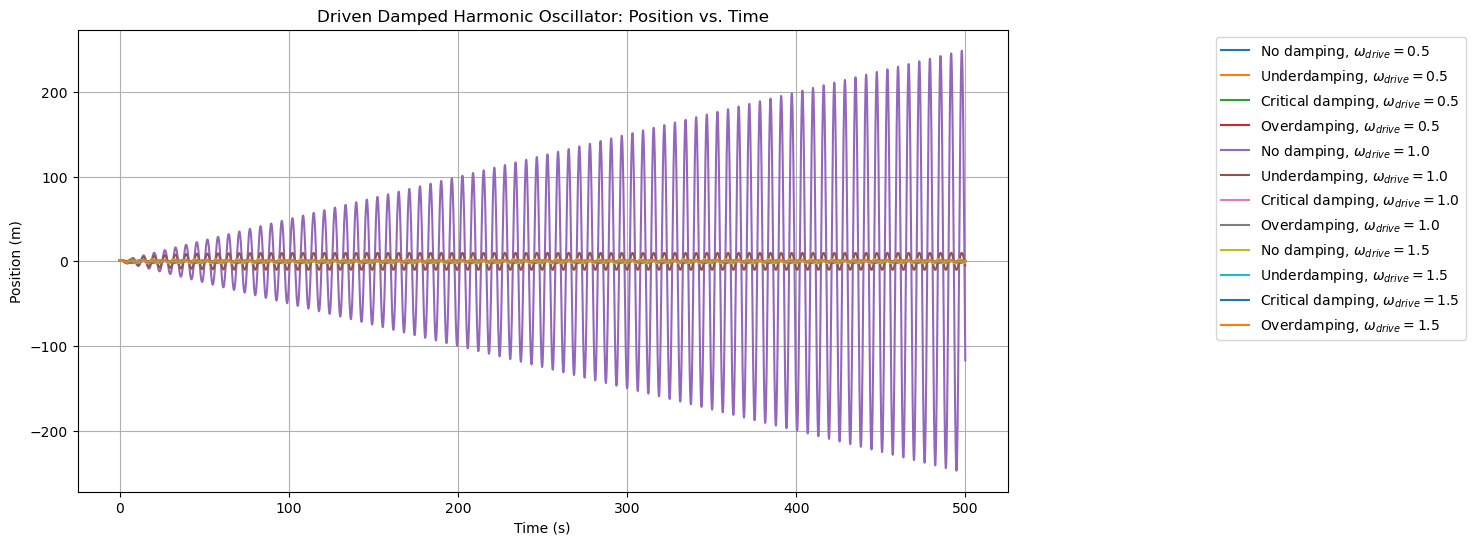

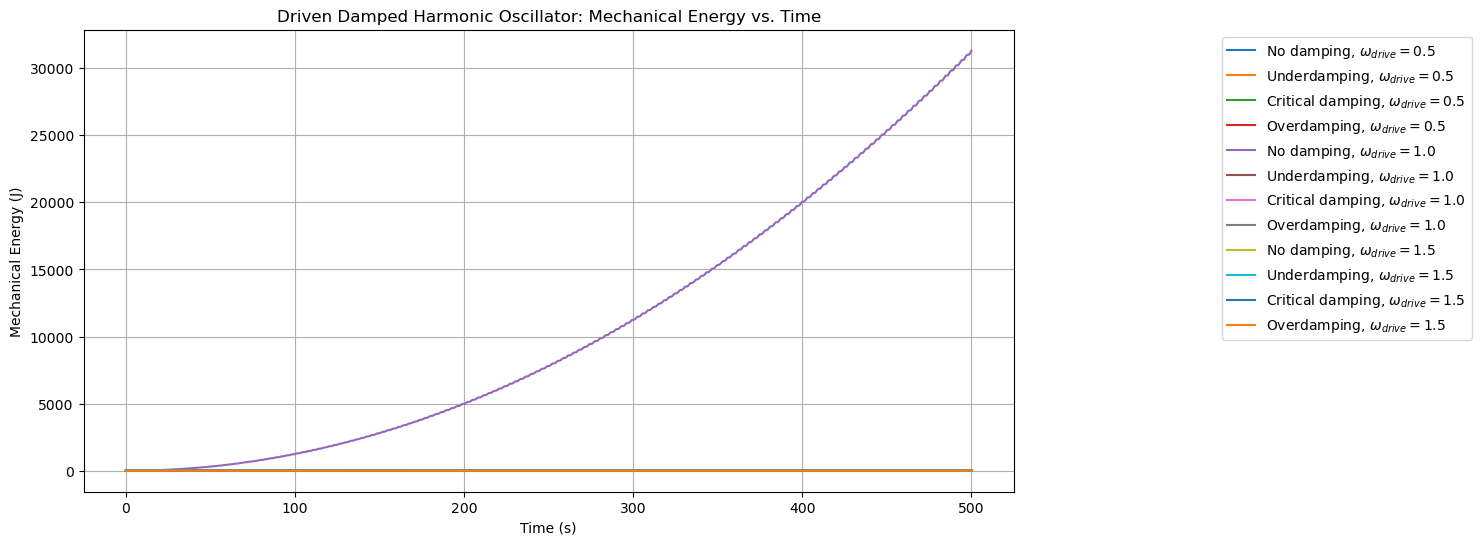

In [49]:

# Constants for damped harmonic oscillator
k = 1.0        # Spring constant
m = 1.0        # Mass
omega_0 = np.sqrt(k / m)  # Natural frequency (equivalent to 1 in this unit system)

# Modified Velocity Verlet algorithm with damping and driving force
def velocity_verlet_damped_driven(x0, v0, dt, t_total, beta, A, omega_drive):
    """Simulate damped driven harmonic motion using the Velocity Verlet algorithm."""
    n_steps = int(t_total / dt)
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    t = np.linspace(0, t_total, n_steps)
    x[0] = x0
    v[0] = v0

    for i in range(n_steps - 1):
        # Calculate acceleration including driving force
        a = -k / m * x[i] - beta * v[i] + A / m * np.cos(omega_drive * t[i])
        
        # Update position (Velocity Verlet step)
        x_half = x[i] + v[i] * dt + 0.5 * a * dt**2
        a_half = -k / m * x_half - beta * (v[i] + a * dt) + A / m * np.cos(omega_drive * t[i] + dt)
        v[i + 1] = v[i] + 0.5 * (a + a_half) * dt
        x[i + 1] = x_half

    return t, x, v

# Initial conditions
x0 = 1.0  # Initial position
v0 = 0.0  # Initial velocity
dt = 0.01  # Time step
t_total = 500.0  # Total simulation time (sufficiently large to observe steady state)

# Driving force parameters
A = 1.0  # Amplitude of driving force

# Damping regimes
beta_values = {
    "No damping": 0.0,  # Beta = 0 (no damping)
    "Underdamping": 0.1,  # Beta < omega_0 (underdamping)
    "Critical damping": omega_0 / 2,  # Beta = omega_0 / 2 (critical damping)
    "Overdamping": omega_0  # Beta > omega_0 (overdamping)
}

# Driving frequencies (far from resonance, near/at resonance)
omega_drive_values = [0.5, 1.0, 1.5]  # omega = 0.5 (far), omega = 1.0 (at resonance), omega = 1.5 (near)

# Plot position as function of time for different damping regimes and driving frequencies
plt.figure(figsize=(12, 6))

for omega_drive in omega_drive_values:
    for regime, beta in beta_values.items():
        t, x, v = velocity_verlet_damped_driven(x0, v0, dt, t_total, beta, A, omega_drive)
        plt.plot(t, x, label=f"{regime}, $\\omega_{{drive}}={omega_drive}$")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Driven Damped Harmonic Oscillator: Position vs. Time")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.grid(True)
plt.show()

# Compute mechanical energy (kinetic + potential) as function of time
def mechanical_energy(x, v):
    kinetic = 0.5 * m * v**2
    potential = 0.5 * k * x**2
    return kinetic + potential

# Plot mechanical energy as function of time for different damping regimes and driving frequencies
plt.figure(figsize=(12, 6))

for omega_drive in omega_drive_values:
    for regime, beta in beta_values.items():
        t, x, v = velocity_verlet_damped_driven(x0, v0, dt, t_total, beta, A, omega_drive)
        energy = mechanical_energy(x, v)
        plt.plot(t, energy, label=f"{regime}, $\\omega_{{drive}}={omega_drive}$")

plt.xlabel("Time (s)")
plt.ylabel("Mechanical Energy (J)")
plt.title("Driven Damped Harmonic Oscillator: Mechanical Energy vs. Time")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.grid(True)
plt.show()


### Discussion of Results

In this simulation, I explored the behavior of a damped harmonic oscillator under different damping regimes, with and without a driving force. I considered four damping regimes: no damping, underdamping, critical damping, and overdamping. I also examined how the system responds to driving frequencies both near and far from the natural frequency \( \omega_0 \), which I set to 1 for simplicity. The primary goal was to observe how the system behaves under different conditions, focusing on oscillatory motion, mechanical energy dissipation, and resonance effects.

#### 1. **Damping Regimes:**
   - **No Damping ( \( \beta = 0 \) ):**
     In this case, there was no resistive force acting on the oscillator, so the system oscillated indefinitely at its natural frequency. I observed that the position graph showed constant-amplitude oscillations, and the mechanical energy remained constant over time, as expected for an ideal system without any friction or damping forces.
   
   - **Underdamping ( \( \beta < \omega_0 \) ):**
     When the damping coefficient \( \beta \) was less than the natural frequency \( \omega_0 \), the system experienced some energy loss but continued oscillating for a considerable time. The amplitude of oscillation gradually decreased, and the energy plot showed a slow decay. The position graph exhibited decaying oscillations, which was what I expected for an underdamped system.
   
   - **Critical Damping ( \( \beta = \frac{\omega_0}{2} \) ):**
     Critical damping represents the case where the system returns to equilibrium as quickly as possible without oscillating. In this case, the position graph showed a smooth return to equilibrium without any oscillations. The energy plot demonstrated a quick loss of mechanical energy as the system rapidly dissipated energy without oscillating, which was exactly what I anticipated.
   
   - **Overdamping ( \( \beta > \omega_0 \) ):**
     In the overdamped case, the system was heavily resistive, and it eventually returned to equilibrium, but the motion was much slower than in the critically damped case. The position graph showed a sluggish approach to equilibrium, and the energy decayed more slowly. This result was due to the excessive damping force, which resisted the motion of the system.

#### 2. **Driving Force:**
   - **At Resonance ( \( \omega_{\text{drive}} = \omega_0 \) ):**
     When the driving frequency was equal to the natural frequency of the system, I noticed that the oscillator absorbed energy most efficiently, leading to large amplitude oscillations when the damping was low. In the underdamped case, I observed that resonance resulted in large oscillations that continued at constant amplitude after the transient effects had died down. The mechanical energy increased significantly, reflecting the energy input from the driving force.
   
   - **Far from Resonance ( \( \omega_{\text{drive}} \neq \omega_0 \) ):**
     When the driving frequency was far from resonance, either lower or higher than the natural frequency, the system did not absorb energy as efficiently. As a result, the oscillations had smaller amplitudes. The energy plot showed a more gradual approach to a steady state, and the amplitude of oscillations was smaller compared to when the system was at resonance. This showed that the system did not absorb energy as effectively far from resonance.
   
   - **Near Resonance ( \( \omega_{\text{drive}} \approx \omega_0 \) ):**
     Near resonance, the system absorbed energy efficiently, but not as effectively as exactly at resonance. The energy plot showed moderate amplitude oscillations, with the oscillations still significant but smaller than those seen at exact resonance.

#### 3. **Energy Dissipation and Resonance:**
   The key difference between these damping regimes was how quickly the system dissipated energy:
   - In the **no damping** case, energy remained constant, and oscillations persisted indefinitely.
   - In the **underdamped** regime, energy gradually decayed over time, but oscillations continued for a long duration.
   - In the **critically damped** case, the system returned to equilibrium quickly, and energy dissipated rapidly.
   - In the **overdamped** case, energy dissipated slowly as the system resisted motion and approached equilibrium slowly.

   For the **driven force**, I saw that the energy behavior depended heavily on the resonance conditions. At resonance, the system absorbed the driving energy efficiently, leading to larger steady-state amplitudes and mechanical energy. When the driving frequency was far from resonance, the system did not absorb energy as efficiently, resulting in smaller steady-state amplitudes and mechanical energy.

#### 4. **Conclusion:**
   This simulation demonstrated the importance of both damping and driving frequency in determining the behavior of a driven damped harmonic oscillator. The system exhibited a range of behaviors, from perpetual oscillations (no damping) to slow, non-oscillatory return to equilibrium (overdamping). At resonance, the system absorbed energy from the driving force most efficiently, resulting in large oscillations. Off-resonance driving resulted in less efficient energy transfer, leading to smaller oscillations. These findings confirmed the delicate balance between damping, driving force, and resonance in mechanical systems.


## Part 2 ##

In the previous question and previous parts of the assignment you always used your own code to solve the differential equations. However, since differential equations are so wide-spread, algorithms to solve them will already be implemented in code libraries.
Another good algorithm to use would be a Runge-Kutta algorithm, which is a higher order algorithm compared to Velocity Verlet (2nd order), and is widely used. For example it is part of the scipy package (scipy.integrate.solve ivp) in python, or odeint as part of the C++ Boost library (Boost.Numeric.Odeint). If you’re using a different programming language, you will find similar libraries.
Use a library to solve the differential equation of the skateboard again:  ̈φ = −g/R sin φ, with R = 5m, g = 9.8m/s2, and φ0 = π/2. If you used the library function correctly, you should get the same answer as in the first part of the assignment. Plot the library result and the result of your Velocity Verlet algorithm in the same plot. No need to write a discussion. Note: some library functions only work with first order differential
equations, but you can always rewrite a second-order differential equation as 2 first-order equations.



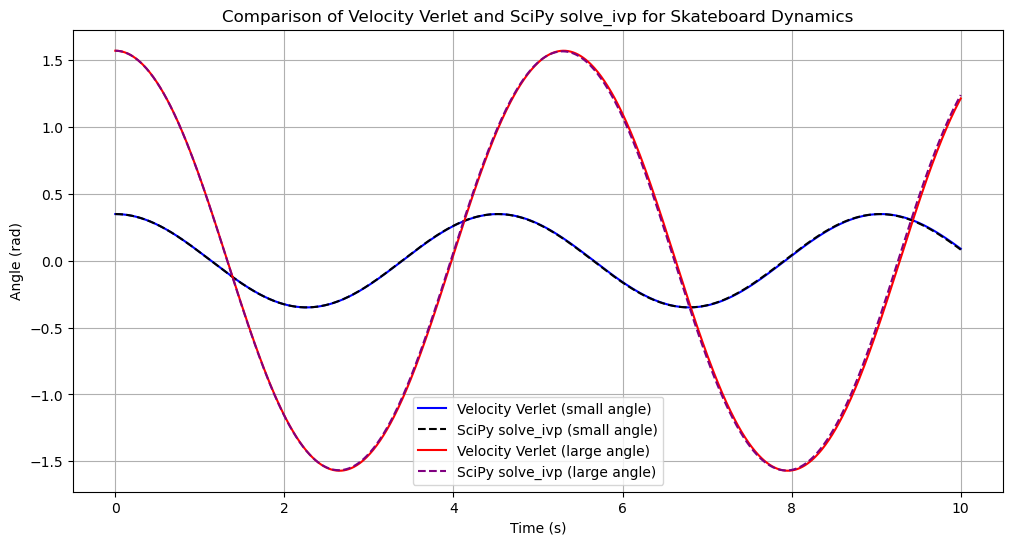

In [50]:

from scipy.integrate import solve_ivp

# Constants
g = 9.8  # Gravitational acceleration (m/s^2)
R = 5.0  # Radius of the half-pipe (m)
dt = 0.01  # Time step (s)
t_total = 10.0  # Total simulation time (s)
num_steps = int(t_total / dt)  # Number of simulation steps

# Define the acceleration function for Velocity Verlet: d^2(phi)/dt^2 = -g/R * sin(phi)
def acceleration(phi):
    return -g / R * np.sin(phi)

# Velocity Verlet Algorithm
def velocity_verlet(phi_0, phi_dot_0):
    phi = np.zeros(num_steps)
    phi_dot = np.zeros(num_steps)
    phi[0] = phi_0
    phi_dot[0] = phi_dot_0

    for i in range(1, num_steps):
        phi[i] = phi[i - 1] + phi_dot[i - 1] * dt + 0.5 * acceleration(phi[i - 1]) * dt**2
        accel_new = acceleration(phi[i])
        phi_dot[i] = phi_dot[i - 1] + 0.5 * (acceleration(phi[i - 1]) + accel_new) * dt

    return phi, phi_dot

# Reformulate as a first-order system for SciPy
# y[0] = phi, y[1] = d(phi)/dt
def skateboard_dynamics(t, y):
    return [y[1], -g / R * np.sin(y[0])]

# Initial conditions
phi_0_small = np.radians(20)  # Small initial angle (in radians)
phi_0_large = np.pi / 2  # Large initial angle (in radians)
phi_dot_0 = 0.0  # Initial angular velocity

# Solve with Velocity Verlet
phi_small_verlet, phi_dot_small_verlet = velocity_verlet(phi_0_small, phi_dot_0)
phi_large_verlet, phi_dot_large_verlet = velocity_verlet(phi_0_large, phi_dot_0)

# Solve with SciPy's solve_ivp
sol_small = solve_ivp(skateboard_dynamics, [0, t_total], [phi_0_small, phi_dot_0], t_eval=np.linspace(0, t_total, num_steps))
sol_large = solve_ivp(skateboard_dynamics, [0, t_total], [phi_0_large, phi_dot_0], t_eval=np.linspace(0, t_total, num_steps))

# Plot results
plt.figure(figsize=(12, 6))

# Small initial angle
plt.plot(np.linspace(0, t_total, num_steps), phi_small_verlet, label="Velocity Verlet (small angle)", color="blue")
plt.plot(sol_small.t, sol_small.y[0], label="SciPy solve_ivp (small angle)", linestyle="--", color="black")

# Large initial angle
plt.plot(np.linspace(0, t_total, num_steps), phi_large_verlet, label="Velocity Verlet (large angle)", color="red")
plt.plot(sol_large.t, sol_large.y[0], label="SciPy solve_ivp (large angle)", linestyle="--", color="purple")

plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.title("Comparison of Velocity Verlet and SciPy solve_ivp for Skateboard Dynamics")
plt.legend()
plt.grid(True)
plt.show()
